# Data preparation

With the data collected and labeled, we will now proceed to clean and visualize the data as well as create new features which will help our machine learning model make better predictions.

In [1]:
import pandas as pd                             # handles datasets
import numpy as np                              # handles arrays
import matplotlib.pyplot as plt                 # plots data
from sklearn.preprocessing import OneHotEncoder # handles categorical data

In [2]:
# Importing dataset:
df = pd.read_csv("Labeled_data.csv", index_col=0)

df.columns

Index(['title', 'y', 'minutes', 'categories', 'uploader', 'views', 'likes',
       'dislikes', 'tags', 'upload_date', 'channel_url', 'webpage_url',
       'query'],
      dtype='object')

Here is the description of the features above:
- title: video's title;
- y: label that indicates if the video is appealing to me (1 if yes, 0 if not);
- minutes: duration of the video in minutes;
- categories: video's categories, such as Education, News&Politics, etc;
- uploader: name of the channel that uploaded the video;
- views: video's number of views;
- likes: video's number of likes;
- dislikes: video's number of dislikes;
- tags: video's tags;
- upload_date: date when the video was uploaded;
- channel_url: link for the video's channel;
- webpage_url: video's link;
- query: subject we used to search for the video.

## Data cleaning

Before doing feature engineering, let's do some quick data cleaning.

In [3]:
# Let's make sure we are working only with labeled entries:
df = df[df['y'].notnull()]

# Removing possible duplicates:
df = df.drop_duplicates(subset=['title', 'uploader', 'minutes','tags'], keep='first')
df.shape

(1393, 13)

In [4]:
print('Positive examples: ',len(df[df['y']==1]))
print('Negative examples: ',len(df[df['y']==0]))

Positive examples:  462
Negative examples:  931


The data are skewed since there are many more negative than positive examples. It is important to be aware of that in order to choose an appropriate model for predictions, as well as performance metrics.

## Data visualization

Let's take a closer look at the data.

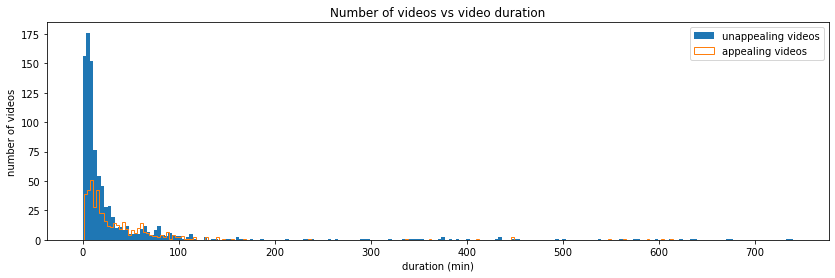

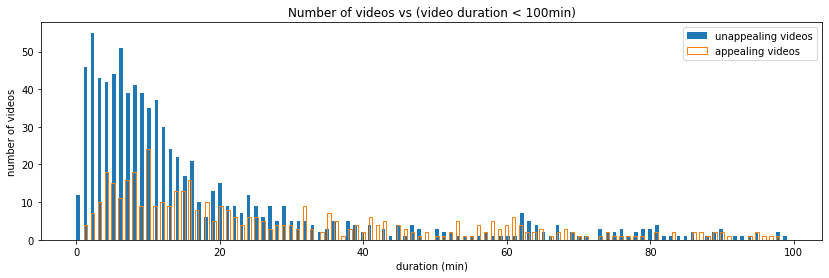

In [5]:
plt.figure(figsize=(14,4)) 
plt.hist(df[df['y']==0]['minutes'],bins=200,label='unappealing videos');
plt.hist(df[df['y']==1]['minutes'],bins=200,label='appealing videos',histtype='step'); plt.legend();
plt.xlabel('duration (min)'); plt.ylabel('number of videos'); plt.title('Number of videos vs video duration');

plt.figure(figsize=(14,4)) 
plt.hist(df[(df['y']==0)&(df['minutes']<100)]['minutes'],bins=200,label='unappealing videos');
plt.hist(df[(df['y']==1)&(df['minutes']<100)]['minutes'],bins=200,label='appealing videos',histtype='step'); plt.legend();
plt.xlabel('duration (min)'); plt.ylabel('number of videos'); plt.title('Number of videos vs (video duration < 100min)');

In [6]:
len(df), len(df[df['minutes']<=15])

(1393, 763)

The first graph above shows that most of the videos have a duration of less than 1 hours. To be even more precise, about half of the videos have a duration of less than 15 minutes, as it is shown in the output above. Also, looking at the duration axis in the second graph, we see that the number of appealing videos is bigger than the number of unappealing videos in the interval between 30 min and 70 min.

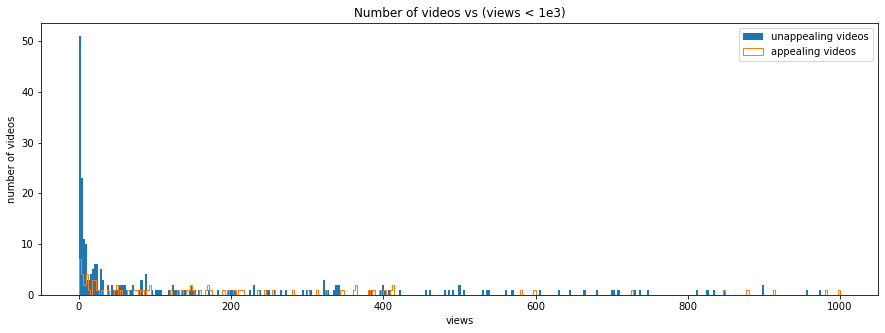

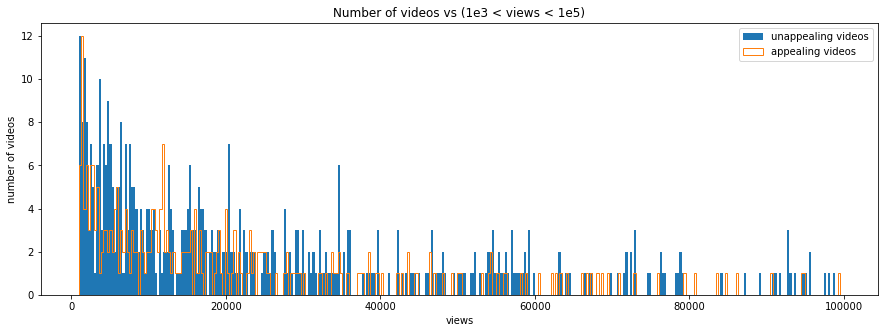

In [7]:
plt.figure(figsize=(15,5)); plt.title('Number of videos vs (views < 1e3)');
plt.hist(df[(df['y']==0)&(df['views']<=1e3)]['views'],bins=350,label='unappealing videos');
plt.hist(df[(df['y']==1)&(df['views']<=1e3)]['views'],bins=350,label='appealing videos',histtype='step');
plt.legend(); plt.xlabel('views'); plt.ylabel('number of videos'); 
plt.figure(figsize=(15,5)); plt.title('Number of videos vs (1e3 < views < 1e5)');
plt.hist(df[(df['y']==0)&((df['views']>=1e3)&(df['views']<=1e5))]['views'],bins=350,label='unappealing videos');
plt.hist(df[(df['y']==1)&((df['views']>=1e3)&(df['views']<=1e5))]['views'],bins=350,label='appealing videos',histtype='step');
plt.legend(); plt.xlabel('views'); plt.ylabel('number of videos');

The two graphs above show how the number of unappealing and appealing videos are related to the number of views the videos have. The first graph show this relation for videos with less than 1000 views, while the second graph shows the relation for videos having views between 1000 and 100000. There are videos with views greater than 100000, but we are ommiting those since their patterns of likeability are somewhat similar to the one shown in the second graph.

What we can infer from the first graph is that I tend find videos with less than 50 views unappealing. The proportion between unappealing and appealing videos seems to be very balanced for videos with views that are greater than 50, as we can see in both graphs.

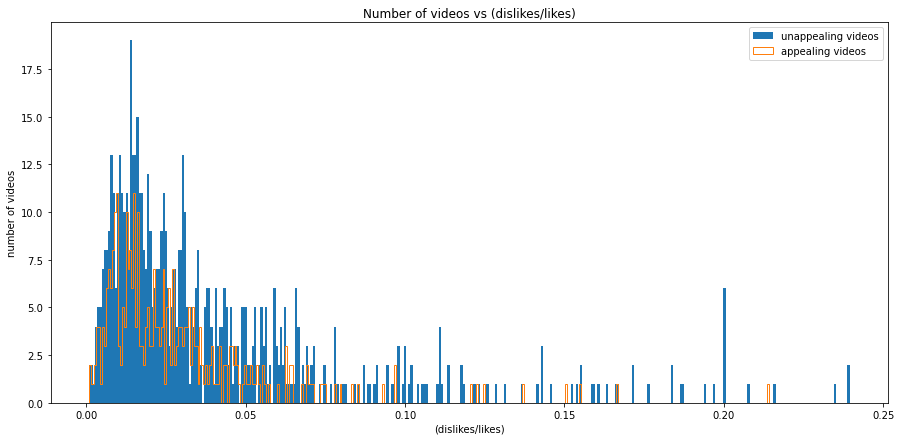

In [8]:
# Ratio between number of dislikes and number of likes, for both unappealing and appealing videos:
unapp = df[df['y']==0].dislikes/df[df['y']==0].likes
app = df[df['y']==1].dislikes/df[df['y']==1].likes

plt.figure(figsize=(15,7)); plt.title('Number of videos vs (dislikes/likes)');
plt.hist(unapp[(unapp>0)&(unapp<0.25)],bins=350,label='unappealing videos');
plt.hist(app[(app>0)&(app<0.25)],bins=350,label='appealing videos',histtype='step');
plt.legend(); plt.xlabel('(dislikes/likes)'); plt.ylabel('number of videos');

The graph above shows that I tend to find more appealing videos for which the number of dislikes is less than 10% of the number of likes.

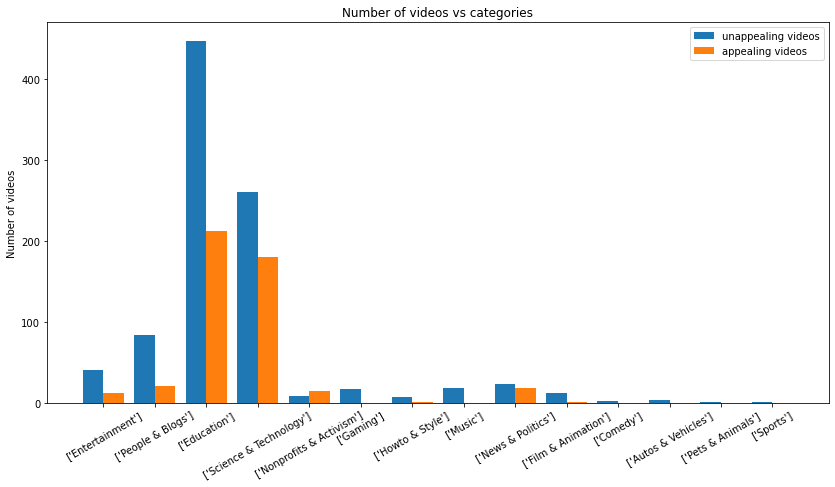

In [9]:
categories = [i for i in df['categories'].unique()]
unapp_videos_per_categ = [len(df[(df['y']==0)&(df['categories']==i)]) for i in categories]
app_videos_per_categ = [len(df[(df['y']==1)&(df['categories']==i)]) for i in categories]

plt.figure(figsize=(14,7)); ax = plt.subplot()

# First plot, related to unappealing videos:
n = 1               # plot list 1 (out of 2)
t = 2               # number of lists
d = len(categories) # number of sets of bars
w = 0.8             # width of each bar
ticks1_x=[t*element + w*n for element in range(d)]; plt.bar(ticks1_x,unapp_videos_per_categ)

# Second plot, related to appealing videos:
n = 2; ticks2_x=[t*element + w*n for element in range(d)]; plt.bar(ticks2_x,app_videos_per_categ)

ax.set_xticks([x+0.4 for x in ticks1_x]) # sets positions of the bars
ax.set_xticklabels(categories,rotation=30); plt.ylabel('Number of videos');
plt.title('Number of videos vs categories');plt.legend(['unappealing videos','appealing videos']);plt.show()

Videos related to categories such as Gaming, Music, Autos&Vehicles, Comedy, Pets&Animals and Sports are unappealing to me. On the other hand, categories such as Nonprofits&Activism, News&Politics and Science&Technology are related to videos that seemed very interesting. Although most of the videos that interest me belong to the Education category, only about a third of the total of the Education videos are in fact appealinng to me.

We can also take a look at how some words that were present at the channel's or uploader's name might have influenced my decision in labeling the video as appealing or unappealing. In order to do that, I glanced at all the entries that were labeled as appealing and tried to identify some words that were repeatedly present.

In [10]:
df[df['y']==1][['uploader','y']].head()

,uploader,y
4,Dividends And Income,1
8,NYSCF,1
12,Rosario Moscato Lab,1
18,"3RI Technologies - AWS, DevOps, Python,Data Sc...",1
24,FRUCT,1


In the following, we define a function that will take a list of words that seems to have some relation to the fact that I find videos appealing, and return the ratio between the number of positive entries and the number of total entries that contain each of the words in the list.

In [11]:
def channel_appeal(list_words):
    r = []
    for i in list_words:
        positive_entries = len(df[df.uploader.str.lower().str.contains(i) & df['y']==1])
        total_entries = len(df[df.uploader.str.lower().str.contains(i)])
        if total_entries>0:
            rate = round( positive_entries / total_entries, 2)
            r.append((i,total_entries,rate))
        else:
            r.append((i,0,0))
    return r

list_words = ['study','learn','school','sci','engineer','lab','mit ','tedx','stanford',
              'google','lex ','marr','amini','proj','brunton','krish','youtube',
              'online','course','amazon','simpli']
r = channel_appeal(list_words)

print('{:<15}  {:<10}  {}'.format("WORD","TOTAL","POSITIVES/TOTAL"))
[print('{:<15}  {:<10}  {}'.format(result[0],result[1],result[2])) for result in r];

WORD             TOTAL       POSITIVES/TOTAL
study            5           0.8
learn            102         0.38
school           9           0.56
sci              35          0.51
engineer         27          0.26
lab              22          0.5
mit              4           1.0
tedx             13          0.62
stanford         33          0.67
google           23          0.52
lex              14          0.71
marr             12          0.67
amini            7           0.71
proj             5           0.8
brunton          10          0.9
krish            39          0.54
youtube          6           0.67
online           34          0.65
course           12          0.5
amazon           9           0.22
simpli           51          0.45


We see that in fact some words in the channel's name may be related to a higher chance for me to find the video appealing. We will address that in the next section.

## Feature engineering

The features which most influenced my decision when I was labeling the videos as "1" (appealing) or "0" (not appealing) will be selected to be part of the training dataset. Additionally, I will use the original features to create new ones that could, in principle, improve the performance of the machine learning model that will be presented in the next notebook "Model.ipynb".

In [12]:
df.head(2)

,title,y,minutes,categories,uploader,views,likes,dislikes,tags,upload_date,channel_url,webpage_url,query
0,Artificial Intelligence and Machine Learning.,0,71,['Entertainment'],COEPian's Academy,0,0.0,0.0,['coaching classes in pune for 11th and 12th s...,2021-05-13,https://www.youtube.com/channel/UCemkcV14dBWo9...,https://www.youtube.com/watch?v=P9XwYnXSM7I,artificial+intelligence
1,I defeated Artificial Intelligence||COD YALGAA...,0,8,['People & Blogs'],D's Gamings,0,0.0,0.0,[],2021-05-13,https://www.youtube.com/channel/UCulGuTpL_oy6I...,https://www.youtube.com/watch?v=HyrOEqicYnA,artificial+intelligence


In [13]:
# New dataset where selected and engineered features will be stored:
df_feat = pd.DataFrame(index=df.index)

#### Categories

Let's start by mapping the categories to numerical values that can be used in our machine learning model. From the last graph above, we saw that there are some categories that could be put together in view of their similiar results when we account for the ratio between the number of videos that are appealing to me and the number of unappealing videos. The results above show this ratio for each category.

In [14]:
print('{:<28}  {}'.format('CATEGORY:','LIKEABILITY:'))
for i in df['categories'].unique():
    j=len(df[(df['categories']==i)&(df['y']==1)])/len(df[(df['categories']==i)&(df['y']==0)])
    print('{:<28}  {}'.format(i,j))

CATEGORY:                     LIKEABILITY:
['Entertainment']             0.2926829268292683
['People & Blogs']            0.25
['Education']                 0.47544642857142855
['Science & Technology']      0.6896551724137931
['Nonprofits & Activism']     1.6666666666666667
['Gaming']                    0.0
['Howto & Style']             0.125
['Music']                     0.0
['News & Politics']           0.7916666666666666
['Film & Animation']          0.08333333333333333
['Comedy']                    0.0
['Autos & Vehicles']          0.0
['Pets & Animals']            0.0
['Sports']                    0.0


We will aggregate the categories ('Sports', 'Pets&Animals',...) whose videos do not interest me in one single label, 0. The categories 'Film & Animation' and 'Howto & Style' have a similiar likeability ratio, therefore we can give them the same label 1. The same happens for 'Entertainment' and 'People & Blogs', so we can label them as 2. Each of the remaining categories will be labeled as a different number.

In [15]:
def categ(x):
    if (x=="['Autos & Vehicles']" or x=="['Gaming']" or x=="['Comedy']" or
        x=="['Sports']" or x=="['Pets & Animals']" or x=="['Music']"): return 0
    elif (x=="['Film & Animation']" or x=="['Howto & Style']"): return 1
    elif (x=="['People & Blogs']" or x=="['Entertainment']"): return 2
    elif x=="['Education']": return 3
    elif x=="['Science & Technology']": return 4
    elif x=="['News & Politics']": return 5
    elif x=="['Nonprofits & Activism']": return 6

df_feat['categ'] = df.categories.apply(categ)
df_feat.head(3)

,categ
0,2
1,2
2,2


Although the feature 'categ' is not ordinal in essence, I intetionally labeled the categories in that specific order to build this feature as ordinal variables. I did this having in mind the likeability rate discussed above. Another option would be transforming this feature into non ordinal categorical data by performing one-hot encoding, but this option lead to higher number of features and slightly worse performance of the model, when I tested it. For this reason, we are going stick with the feature 'categ' as being an ordinal feature.

In [16]:
#df_feat = pd.get_dummies(df_feat,columns=['categ'],drop_first=True)
#df_feat.head(3)

#### Duration

The following new feature is related to the length of the videos, where I am assigning different values for videos with duration less than 30 minutes, between 30 and 70 minutes, and longer than 70 minutes:

In [17]:
def duration(x):
    if x<=30: return 0
    elif x>30 and x<=70: return 1
    else: return 2

df_feat['duration'] = df.minutes.apply(duration)

#### Views 

Next, the new feature 'views' relates to the number of views divided into four different blocks: videos with less than 50 views, videos with views between 50 and 1000, between 1000 and 100,000, and videos with views beyond 100,000:

In [18]:
def views(x):
    if x<=50: return 0
    elif x>50 and x<=1e3: return 1
    elif x>1e3 and x<=1e5: return 2
    else: return 3

df_feat['views'] = df.views.apply(views)

#### Like_ratio

We will also create a feature based on the ratio dislike/likes. For videos in which the numbers of dislikes are above 10% the number of likes, we will assign label 0, and 1 otherwise:

In [19]:
like_ratio = df['dislikes']/df['likes']
df_feat['like_ratio'] = [0 if i>0.1 else 1 for i in like_ratio]

#### Channel_appeal
As we saw in the previous section, the presence of some specific words in the channel's name seems to have an impact in me finding a video appealing. The way that we will translate this into a feature for the dataset is the following: for each entry it will be assigned a value 0, 1, 2 or 3 depending on if it contains any of the words in the list of interesting words that I selected beforehand in the lists in the cell bellow; if the entry contains any of the words in list_3, or in list_2, or in list_1, it will be assigned the value 3, 2 and 1, respectively; if the entry contains none of the words in those lists, it will be assigned the value 0.

In [20]:
list_3 = ['study','mit ','lex ','amini','proj','brunton']
list_2 = ['tedx','stanford','marr','youtube','online']
list_1 = ['school','sci','lab','google','krish','course']

def ch_appeal(channel_name):
    l3 = [True for word in list_3 if word in channel_name]
    l2 = [True for word in list_2 if word in channel_name]
    l1 = [True for word in list_1 if word in channel_name]
    if any(l3):
        return 3
    if any(l2):
        return 2
    if any(l1):
        return 1
    else:
        return 0
    
df_feat['channel_appeal'] = df.uploader.str.lower().apply(ch_appeal)

In [21]:
len(df_feat[df_feat['channel_appeal']==0]),len(df_feat[df_feat['channel_appeal']==1]),len(df_feat[df_feat['channel_appeal']==2]),len(df_feat[df_feat['channel_appeal']==3])

(1146, 133, 69, 45)

Another feature which certainly exerted the greatest impact on my decisions when I was manually labeling the videos as appealing or unappealing is the feature 'title'. Hence, we will include it to our final training dataset. In the notebook "2_Model.ipynb", we will transform the text entries of the 'title' feature into numerical values that will be used to train our model.

Furthermore, we need to include the label 'y' which indicates if the video is unappealing or appealing to our final training dataset:

In [22]:
df_feat['title'] = df['title'].copy()
df_feat['y'] = df['y'].copy()
df_feat.head(2)

,categ,duration,views,like_ratio,channel_appeal,title,y
0,2,2,0,1,0,Artificial Intelligence and Machine Learning.,0
1,2,0,0,1,0,I defeated Artificial Intelligence||COD YALGAA...,0


In [23]:
# Save dataset to csv file:
df_feat.to_csv("train.csv")